In [1]:
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
from scipy.fft import fft, fftfreq
import scipy.signal as sg

In [2]:
def nextpow2(i):
  n = 2
  while n < i: n = n*2
  return n

In [3]:
def fft_signal(y_, fs):
  # Get length of data
  L = len(y_)
  # Calculate optimal length of FFT using nextpow2
  NFFT = 2^nextpow2(L)
  # Calculate fft using Numpy FFT method
  INPUT = fft(y_, NFFT)/L
  # Create frequency (x) axis data for plotting
  f = fs/2 * np.linspace(0, 1, int(NFFT/2 + 1))
  # Calculate magnitude response from FFT data
  m = 2*abs(INPUT[0:int(NFFT/2 + 1)])
  # Return frequency axis data, magnitude response, and FFT length
  return  f, m

Text(0, 0.5, 'Amplitud (V)')

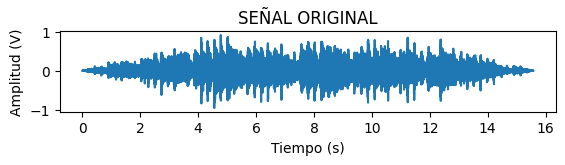

In [4]:
## Leer la señal de audio
[y,fs]=sf.read('Yabu_mono.wav', dtype = 'float32') 

# y -> muestras de la señal

# fs-> frecuencia de muestreo

# Graficar la señal original
N = len(y)
T = N/fs 
t = np.linspace(0, T, len(y))

plt.figure()
plt.subplot(411)
plt.plot(t,y)
plt.title('SEÑAL ORIGINAL')# Título
plt.xlabel('Tiempo (s)')         # Etiqueta del eje X
plt.ylabel('Amplitud (V)')  

Text(0, 0.5, '|Y(f)|')

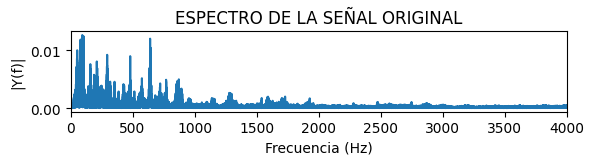

In [5]:
ax2 = plt.subplot(412)

# Llamado a la función que calcula la FFT

f1, m1 = fft_signal(y, fs)
plt.plot(f1, m1)
plt.xlim([0, 4e3]) 
plt.title('ESPECTRO DE LA SEÑAL ORIGINAL')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('|Y(f)|')

In [6]:
tipo = 1 

if tipo == 1:
    # Cálculo de los coeficientes del filtro (filtro pasa bajas)
    # Este filtrado deja solo la señal por debajo de 500 Hz        
    titulo='FILTRO PASA BAJAS' 
    # Frecuencia normalizada de corte
    fNorm = 1000 / (fs/2) 

    [b,a] = sg.butter(10, fNorm, 'low') 

elif tipo == 2:

    #- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    # Cálculo de los coeficientes del filtro (filtro pasa altas)
    # Este filtrado deja solo la señal por encima de 500 Hz
    titulo='FILTRO PASA ALTAS' 
    # Frecuencia normalizada
    fNorm = 1000 / (fs/2) 
    [b,a] = sg.butter(10, fNorm, 'high') 
elif tipo == 3:
    #- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Cálculo de los coeficientes del filtro (filtro pasa banda)
    # Este filtrado deja solo la señal de 2KHz a 3KHz
    # Frecuencias normalizadas
    titulo='FILTRO PASA BANDA' 
    Wp = np.asarray([2e3, 2.5e3])/(fs/2)  
    Ws = np.asarray([1.5e3, 3e3])/(fs/2) 
    Rp = 3  
    Rs = 40  # Rizado de la banda de paso y de parada (s)
    [n,Wn] = sg.buttord(Wp,Ws,Rp,Rs) # Orden del filtro y frecuencia de corte óptima
    [b,a] = sg.butter(n,Wn,'bandpass')       # Coeficientes del filtro       
        
elif tipo == 4:
    #- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    #Filtro supresor de banda
    titutlo='FILTRO RECHAZA BANDA' 
    Wp = np.asarray([2e3, 2.5e3])/(fs/2)
    Ws = np.asarray([1.5e3, 3e3])/(fs/2) 
    #Wp Frecuencia (de corte) de esquina de banda de paso
    #Ws  Frecuencia de esquina de banda de parada
    Rp = 3  #Ondulación de banda de paso
    Rs = 40  #Atenuación de banda de parada
    [n,Wn] = sg.buttord(Wp,Ws,Rp,Rs) 
    #Wn Frecuencias de corte
    [b,a] = sg.butter(n,Wn,'stop') 
# Filtrado de la señal

y_Low = sg.filtfilt(b, a, y) 


<function matplotlib.pyplot.show(close=None, block=None)>

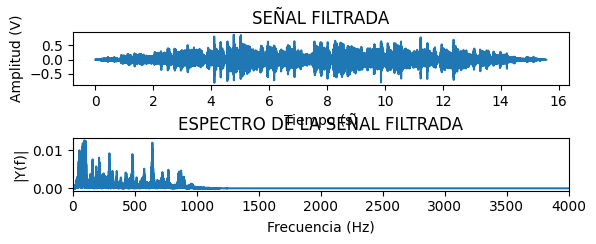

In [7]:
plt.subplot(413)

plt.plot(t,y_Low)

plt.title('SEÑAL FILTRADA')

plt.xlabel('Tiempo (s)')

plt.ylabel('Amplitud (V)')

# xlim([0 20/f0])

# Graficación de la señal en frecuencia

plt.subplot(414)

# Llamado a la función que calcula la FFT

f2, m2 = fft_signal(y_Low,fs)
plt.plot(f2, m2)
plt.title('ESPECTRO DE LA SEÑAL FILTRADA')
plt.xlim([0, 4e3])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('|Y(f)|')
plt.subplots_adjust(hspace=1)
plt.show